In [ ]:
!pip install sentence-transformers pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all_results.csv")

In [ ]:
df

,Unnamed: 0,verse,predicted_labels,predicted_scores
0,0,"This phenomenal creation, which is both epheme...",awe,0.813607991
1,1,"Its branches shoot upwards and downwards, der...","hope, awe","0.7271633744239807, 0.6616836786270142"
2,2,"In this world its true form is not known, nei...","detachment, surprise","0.9701771140098572, 0.811923623085022"
3,3,"Beyond lies the Path, from which, when found,...",devotion,0.500485718
4,4,"The wise attain Eternity when, freed from pri...","detachment, peace, awe","0.884010910987854, 0.7887124419212341, 0.53431..."
...,...,...,...,...
2091,43,By the sins of these family-slayers resultin...,Neutral,NaN
2092,44,"For we have had it handed down to us, O Kris...",trust,0.511367142
2093,45,Alas! What a heinous sin we are about to com...,sadness,0.897556841
2094,46,Happier far would it be for me if Dhritarash...,"detachment, anticipation, joy, devotion, hope","0.9107015132904053, 0.7182073593139648, 0.6686..."


In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def get_semantic_scores(verse, labels):
    verse_embedding = model.encode(verse, convert_to_tensor=True)
    scores = {}
    for label in labels:
        prompt = f"This is a spiritual verse about the feeling of {label}."
        label_embedding = model.encode(prompt, convert_to_tensor=True)
        cosine_score = float(util.cos_sim(verse_embedding, label_embedding))
        scores[label] = cosine_score
    return scores

In [ ]:
all_scores = []

for i, row in df.iterrows():
    verse = row['verse']
    bart_labels = [label.strip() for label in str(row['all_predicted_labels']).split(',') if label.strip()]

    # Get similarity scores between verse and its own BART labels
    score_dict = get_semantic_scores(verse, bart_labels)

    # Calculate mean similarity score (optional but useful)
    mean_score = sum(score_dict.values()) / len(score_dict)

    # Store the results
    result = {
        'verse': verse,
        'bart_labels': bart_labels,
        'semantic_scores': score_dict,
        'mean_semantic_score': mean_score
    }

    all_scores.append(result)

# Create DataFrame
semantic_df = pd.DataFrame(all_scores)


In [ ]:
semantic_df

,verse,bart_labels,semantic_scores,mean_semantic_score
0,“Lord Shri Krishna continued: This phenomenal ...,"[awe, devotion]","{'awe': 0.3644336462020874, 'devotion': 0.3584...",0.361437
1,"Its branches shoot upwards and downwards, der...","[hope, awe]","{'hope': 0.3155278265476227, 'awe': 0.35761320...",0.336571
2,"In this world its true form is not known, nei...","[detachment, surprise]","{'detachment': 0.2884286046028137, 'surprise':...",0.260635
3,"Beyond lies the Path, from which, when found,...",[devotion],{'devotion': 0.36412984132766724},0.364130
4,"The wise attain Eternity when, freed from pri...","[detachment, peace, awe]","{'detachment': 0.4091009497642517, 'peace': 0....",0.410865
...,...,...,...,...
2089,By the sins of these family-slayers resultin...,[Neutral],{'Neutral': 0.372300922870636},0.372301
2090,"For we have had it handed down to us, O Kris...",[trust],{'trust': 0.2482861429452896},0.248286
2091,Alas! What a heinous sin we are about to com...,[sadness],{'sadness': 0.14701534807682037},0.147015
2092,Happier far would it be for me if Dhritarash...,"[detachment, anticipation, joy, devotion, hope]","{'detachment': 0.1931382417678833, 'anticipati...",0.183748


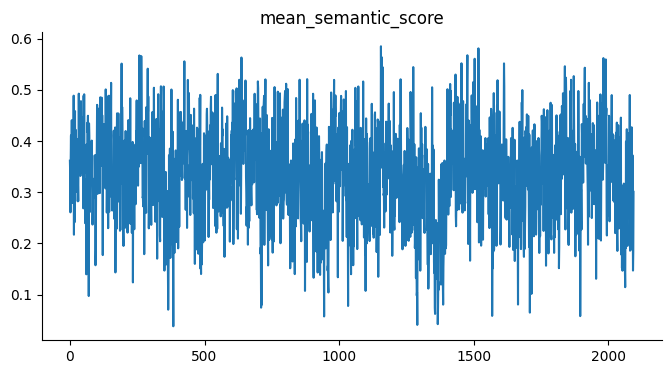

In [ ]:
from matplotlib import pyplot as plt
semantic_df['mean_semantic_score'].plot(kind='line', figsize=(8, 4), title='mean_semantic_score')
plt.gca().spines[['top', 'right']].set_visible(False)

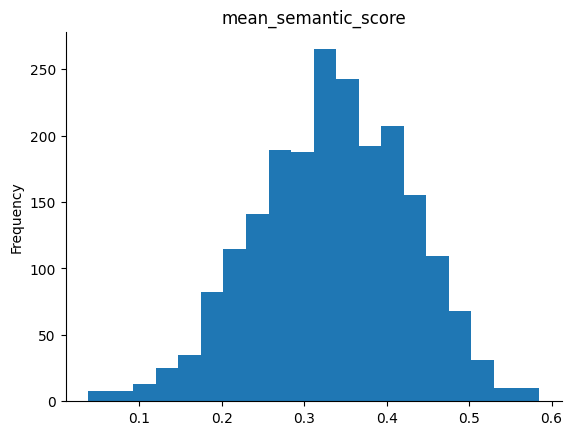

In [ ]:
from matplotlib import pyplot as plt
semantic_df[''].plot(kind='hist', bins=20, title='mean_semantic_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df

,verse,all_predicted_labels,all_predicted_scores
0,“Lord Shri Krishna continued: This phenomenal ...,"awe, devotion","0.84, 0.55"
1,"Its branches shoot upwards and downwards, der...","hope, awe","0.72, 0.61"
2,"In this world its true form is not known, nei...","detachment, surprise","0.97, 0.81"
3,"Beyond lies the Path, from which, when found,...",devotion,0.5
4,"The wise attain Eternity when, freed from pri...","detachment, peace, awe","0.88, 0.79, 0.53"
...,...,...,...
2089,By the sins of these family-slayers resultin...,Neutral,100
2090,"For we have had it handed down to us, O Kris...",trust,0.51
2091,Alas! What a heinous sin we are about to com...,sadness,0.9
2092,Happier far would it be for me if Dhritarash...,"detachment, anticipation, joy, devotion, hope","0.91, 0.72, 0.67, 0.66, 0.55"


In [ ]:
# Save the DataFrame to a CSV file
semantic_df.to_csv('/content/drive/MyDrive/semantic_scores.csv', index=False)

print("Semantic scores saved successfully to /content/drive/MyDrive/semantic_scores_Verse_wise.csv")

Semantic scores saved successfully to /content/drive/MyDrive/semantic_scores_Verse_wise.csv


In [ ]:
# prompt: find maximum and minimum value in all_predicted-columns

# Assuming 'all_predicted_labels' is a column in the original DataFrame 'df'
# You would need to process the 'all_predicted_labels' column to extract the scores.
# Based on the provided code, the semantic scores are calculated and stored in 'semantic_df'.
# The task asks about 'all_predicted-columns', which seems to refer to the scores derived
# from the 'all_predicted_labels'. The semantic scores are in the 'semantic_scores' column of 'semantic_df'.

# Since 'semantic_scores' is a dictionary in each row, we need to extract all the individual scores
# from all rows to find the overall min and max.

all_individual_scores = []
for scores_dict in semantic_df['semantic_scores']:
  if isinstance(scores_dict, dict): # Ensure it's a dictionary
    all_individual_scores.extend(scores_dict.values())
  else:
      # Handle cases where the entry might not be a dictionary (e.g., if there were no labels)
      # You might want to log a warning or skip these entries depending on your data.
      pass

if all_individual_scores:
  min_score = min(all_individual_scores)
  max_score = max(all_individual_scores)

  print(f"Minimum value in all semantic scores: {min_score}")
  print(f"Maximum value in all semantic scores: {max_score}")
else:
  print("No semantic scores found to calculate min and max.")

Minimum value in all semantic scores: 0.01416453905403614
Maximum value in all semantic scores: 0.6867199540138245


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

all_scores = [score for row in semantic_df['semantic_scores'] for score in row.values()]
sns.histplot(all_scores, bins=30, kde=True)
plt.title("Distribution of Semantic Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

NameError: name 'semantic_df' is not defined

In [ ]:
prompt_templates = [
    "This is a spiritual verse about the feeling of {}.",
    "This verse expresses the emotion of {}.",
    "Spiritual theme: {}.",
    "Emotion conveyed: {}.",
    "The verse reflects {}."
]


In [ ]:
import seaborn as sns

RUN THUS STRAIGHT >>>> NO NEED TO RUN PREVIOUS CELLLS FROM CELL **bold text** **bold

                                                  verse  \
0     “Lord Shri Krishna continued: This phenomenal ...   
1      Its branches shoot upwards and downwards, der...   
2      In this world its true form is not known, nei...   
3      Beyond lies the Path, from which, when found,...   
4      The wise attain Eternity when, freed from pri...   
...                                                 ...   
2089    By the sins of these family-slayers resultin...   
2090    For we have had it handed down to us, O Kris...   
2091    Alas! What a heinous sin we are about to com...   
2092    Happier far would it be for me if Dhritarash...   
2093    Thus spoke Arjuna on the field of battle, an...   

                                          bart_labels  \
0                                     [awe, devotion]   
1                                         [hope, awe]   
2                              [detachment, surprise]   
3                                          [devotion]   
4     

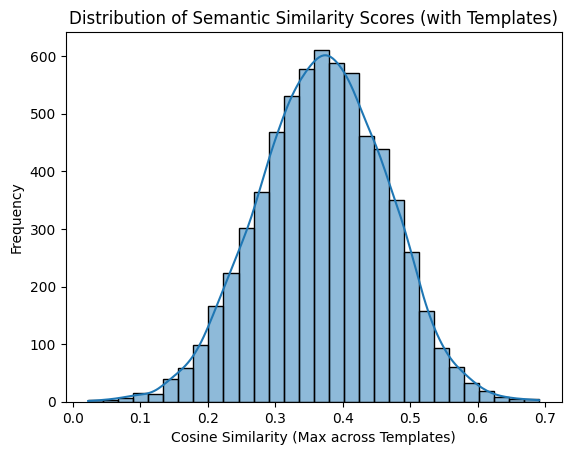

Semantic scores with templates saved successfully to /content/drive/MyDrive/semantic_scores_with_templates_verse_wise.csv


In [ ]:
# prompt: prompt_templates = [
#     "This is a spiritual verse about the feeling of {}.",
#     "This verse expresses the emotion of {}.",
#     "Spiritual theme: {}.",
#     "Emotion conveyed: {}.",
#     "The verse reflects {}."
# ]
# use this prompts at the time of matching and then tell generate the scaores based on maximum score in each label

import pandas as pd
import matplotlib.pyplot as plt
def get_semantic_scores_with_templates(verse, labels, prompt_templates):
    verse_embedding = model.encode(verse, convert_to_tensor=True)
    scores_per_label = {}

    for label in labels:
        highest_score_for_label = -1  # Initialize with a low value
        for template in prompt_templates:
            prompt = template.format(label)
            label_embedding = model.encode(prompt, convert_to_tensor=True)
            cosine_score = float(util.cos_sim(verse_embedding, label_embedding))
            highest_score_for_label = max(highest_score_for_label, cosine_score)
        scores_per_label[label] = highest_score_for_label
    return scores_per_label

all_scores_with_templates = []

for i, row in df.iterrows():
    verse = row['verse']
    bart_labels = [label.strip() for label in str(row['all_predicted_labels']).split(',') if label.strip()]

    # Get similarity scores using multiple templates
    score_dict_with_templates = get_semantic_scores_with_templates(verse, bart_labels, prompt_templates)

    # Calculate mean similarity score (optional but useful)
    # Only calculate mean if there are labels and scores
    if bart_labels and score_dict_with_templates:
        mean_score_with_templates = sum(score_dict_with_templates.values()) / len(score_dict_with_templates)
    else:
        mean_score_with_templates = 0

    # Store the results
    result_with_templates = {
        'verse': verse,
        'bart_labels': bart_labels,
        'semantic_scores_with_templates': score_dict_with_templates,
        'mean_semantic_score_with_templates': mean_score_with_templates
    }

    all_scores_with_templates.append(result_with_templates)

# Create DataFrame
semantic_df_with_templates = pd.DataFrame(all_scores_with_templates)

# Display the new DataFrame
print(semantic_df_with_templates)

# Analyze scores based on maximum score per label across templates
all_individual_scores_with_templates = []
for scores_dict in semantic_df_with_templates['semantic_scores_with_templates']:
  if isinstance(scores_dict, dict):
    all_individual_scores_with_templates.extend(scores_dict.values())
  else:
      pass

if all_individual_scores_with_templates:
  min_score_with_templates = min(all_individual_scores_with_templates)
  max_score_with_templates = max(all_individual_scores_with_templates)

  print(f"Minimum value in all semantic scores (with templates): {min_score_with_templates}")
  print(f"Maximum value in all semantic scores (with templates): {max_score_with_templates}")
else:
  print("No semantic scores found (with templates) to calculate min and max.")

# You can visualize the distribution of these scores as well
if all_individual_scores_with_templates:
    sns.histplot(all_individual_scores_with_templates, bins=30, kde=True)
    plt.title("Distribution of Semantic Similarity Scores (with Templates)")
    plt.xlabel("Cosine Similarity (Max across Templates)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No scores to plot.")

# Save the new DataFrame to a CSV file
semantic_df_with_templates.to_csv('/content/drive/MyDrive/semantic_scores_with_templates.csv', index=False)

print("Semantic scores with templates saved successfully to /content/drive/MyDrive/semantic_scores_with_templates_verse_wise.csv")


In [ ]:
template_results = pd.read_csv('/content/drive/MyDrive/semantic_scores_with_templates.csv')

In [ ]:
template_results

,verse,bart_labels,semantic_scores_with_templates,mean_semantic_score_with_templates
0,“Lord Shri Krishna continued: This phenomenal ...,"['awe', 'devotion']","{'awe': 0.372836709022522, 'devotion': 0.35844...",0.365638
1,"Its branches shoot upwards and downwards, der...","['hope', 'awe']","{'hope': 0.3155278265476227, 'awe': 0.35906434...",0.337296
2,"In this world its true form is not known, nei...","['detachment', 'surprise']","{'detachment': 0.2884286046028137, 'surprise':...",0.260635
3,"Beyond lies the Path, from which, when found,...",['devotion'],{'devotion': 0.3985275626182556},0.398528
4,"The wise attain Eternity when, freed from pri...","['detachment', 'peace', 'awe']","{'detachment': 0.4091009497642517, 'peace': 0....",0.412851
...,...,...,...,...
2089,By the sins of these family-slayers resultin...,['Neutral'],{'Neutral': 0.3843325972557068},0.384333
2090,"For we have had it handed down to us, O Kris...",['trust'],{'trust': 0.25280115008354187},0.252801
2091,Alas! What a heinous sin we are about to com...,['sadness'],{'sadness': 0.19914472103118896},0.199145
2092,Happier far would it be for me if Dhritarash...,"['detachment', 'anticipation', 'joy', 'devotio...","{'detachment': 0.26045745611190796, 'anticipat...",0.236262


In [ ]:
# prompt: give me a dataframe in which the maximunm  semantic socre with that particular label is there

import pandas as pd
# Function to get the label with the maximum semantic score for each row
def get_max_score_label(scores_dict):
    if not scores_dict:
        return None, None  # Return None if the dictionary is empty
    max_label = max(scores_dict, key=scores_dict.get)
    max_score = scores_dict[max_label]
    return max_label, max_score

# Apply the function to the 'semantic_scores_with_templates' column
semantic_df_with_templates[['max_score_label', 'max_semantic_score']] = semantic_df_with_templates['semantic_scores_with_templates'].apply(
    lambda x: pd.Series(get_max_score_label(x))
)

# Create a new DataFrame containing only the 'verse', 'max_score_label', and 'max_semantic_score'
max_score_df = semantic_df_with_templates[['verse', 'max_score_label', 'max_semantic_score']].copy()

# Display the new DataFrame
print("\nDataFrame with maximum semantic score and its corresponding label:")
print(max_score_df)

# You can save this new DataFrame if needed
max_score_df.to_csv('/content/drive/MyDrive/max_semantic_score_per_label_verse_wise.csv', index=False)
print("\nDataFrame with maximum semantic scores saved successfully to /content/drive/MyDrive/max_semantic_score_per_label.csv")


DataFrame with maximum semantic score and its corresponding label:
                                                  verse max_score_label  \
0     “Lord Shri Krishna continued: This phenomenal ...             awe   
1      Its branches shoot upwards and downwards, der...             awe   
2      In this world its true form is not known, nei...      detachment   
3      Beyond lies the Path, from which, when found,...        devotion   
4      The wise attain Eternity when, freed from pri...           peace   
...                                                 ...             ...   
2089    By the sins of these family-slayers resultin...         Neutral   
2090    For we have had it handed down to us, O Kris...           trust   
2091    Alas! What a heinous sin we are about to com...         sadness   
2092    Happier far would it be for me if Dhritarash...             joy   
2093    Thus spoke Arjuna on the field of battle, an...         sadness   

      max_semantic_score  
0   

In [ ]:
labels_and_scores = pd.read_csv('/content/drive/MyDrive/max_semantic_score_per_label_verse_wise.csv')

In [ ]:
labels_and_scores

,verse,max_score_label,max_semantic_score
0,“Lord Shri Krishna continued: This phenomenal ...,awe,0.372837
1,"Its branches shoot upwards and downwards, der...",awe,0.359064
2,"In this world its true form is not known, nei...",detachment,0.288429
3,"Beyond lies the Path, from which, when found,...",devotion,0.398528
4,"The wise attain Eternity when, freed from pri...",peace,0.421307
...,...,...,...
2089,By the sins of these family-slayers resultin...,Neutral,0.384333
2090,"For we have had it handed down to us, O Kris...",trust,0.252801
2091,Alas! What a heinous sin we are about to com...,sadness,0.199145
2092,Happier far would it be for me if Dhritarash...,joy,0.269518


<ipython-input-19-13ab22912e17>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Predicted Label')


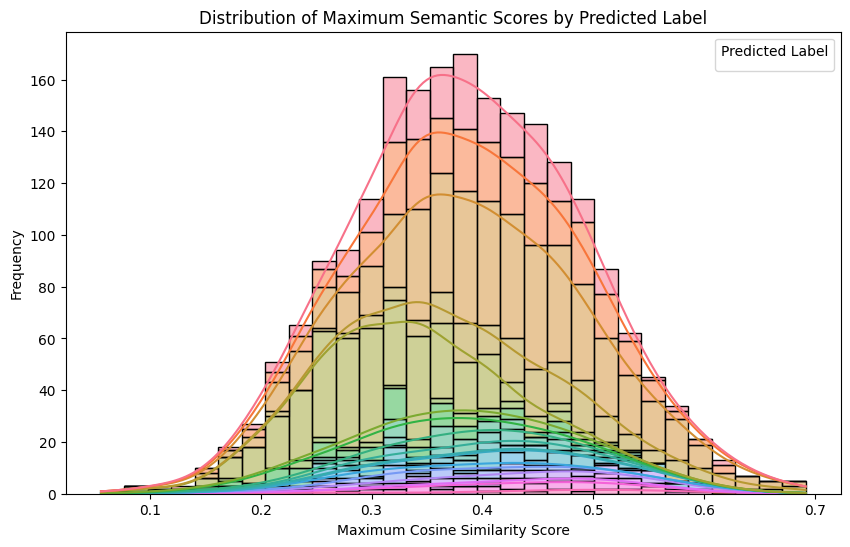

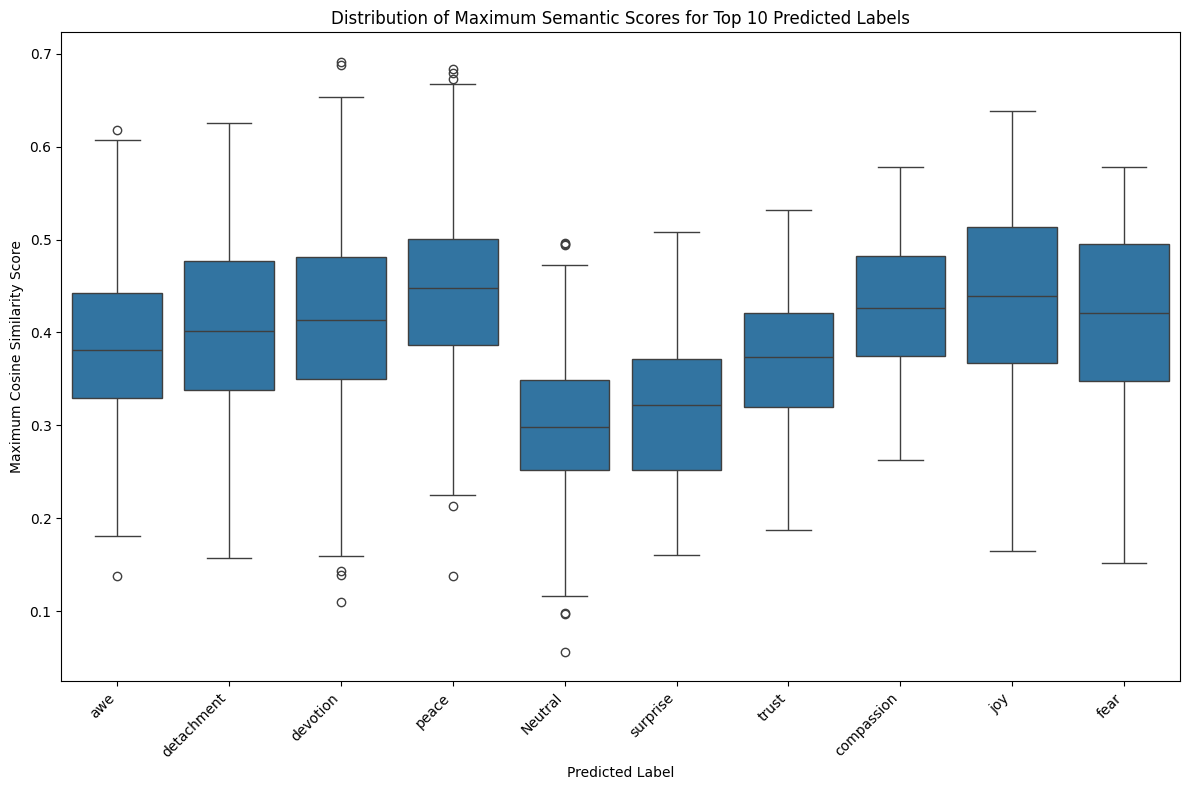

In [ ]:
# prompt: plow a curve for max_semantic scores vs labels

import matplotlib.pyplot as plt
# Prepare data for plotting: count occurrences of each label with its max semantic score
# We can group by the label and then analyze the distribution of scores for each label.
# However, plotting a single curve of max_semantic_scores vs labels directly doesn't make sense
# because labels are categorical, not a continuous axis.
# A more informative plot would be a box plot or violin plot showing the distribution of
# max_semantic_scores for each label.

# Let's create a plot showing the distribution of max_semantic_scores for the top N labels
# Or simply plot the distribution of all max semantic scores, colored by label.

# Option 1: Distribution of all max semantic scores
plt.figure(figsize=(10, 6))
sns.histplot(data=max_score_df, x='max_semantic_score', hue='max_score_label', multiple="stack", bins=30, kde=True)
plt.title("Distribution of Maximum Semantic Scores by Predicted Label")
plt.xlabel("Maximum Cosine Similarity Score")
plt.ylabel("Frequency")
plt.legend(title='Predicted Label')
plt.show()

# Option 2: Box plot or Violin plot for top N labels (if there are many unique labels)
# Let's find the most frequent labels first
top_labels = max_score_df['max_score_label'].value_counts().nlargest(10).index # Get top 10 labels
top_labels_df = max_score_df[max_score_df['max_score_label'].isin(top_labels)].copy()

if not top_labels_df.empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=top_labels_df, x='max_score_label', y='max_semantic_score')
    plt.title("Distribution of Maximum Semantic Scores for Top 10 Predicted Labels")
    plt.xlabel("Predicted Label")
    plt.ylabel("Maximum Cosine Similarity Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No data for top labels to plot box plot.")

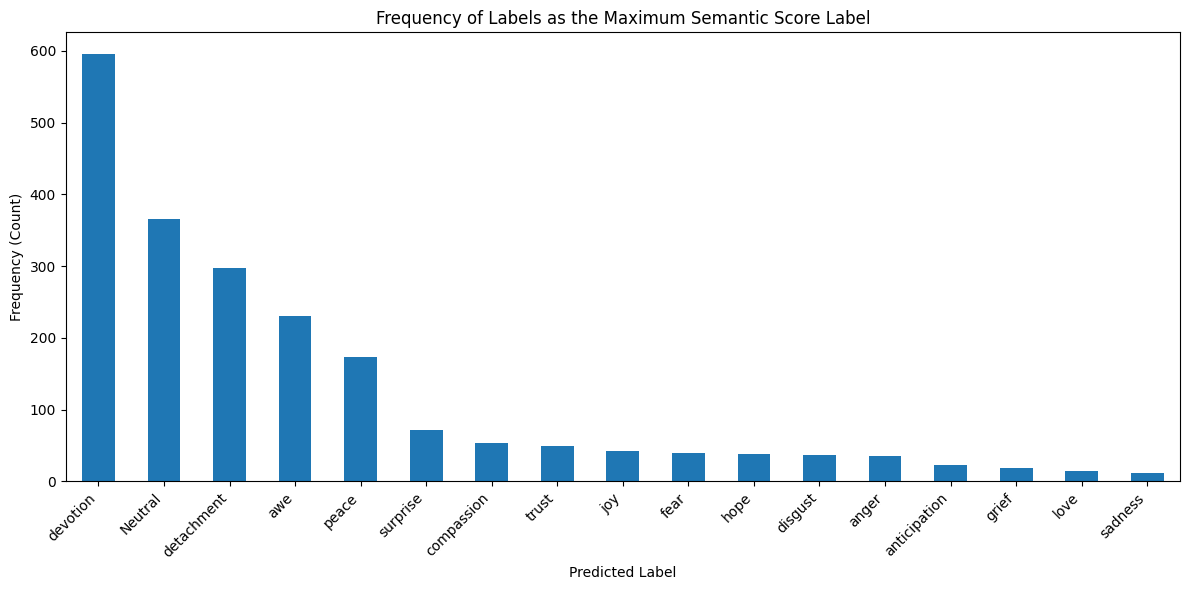

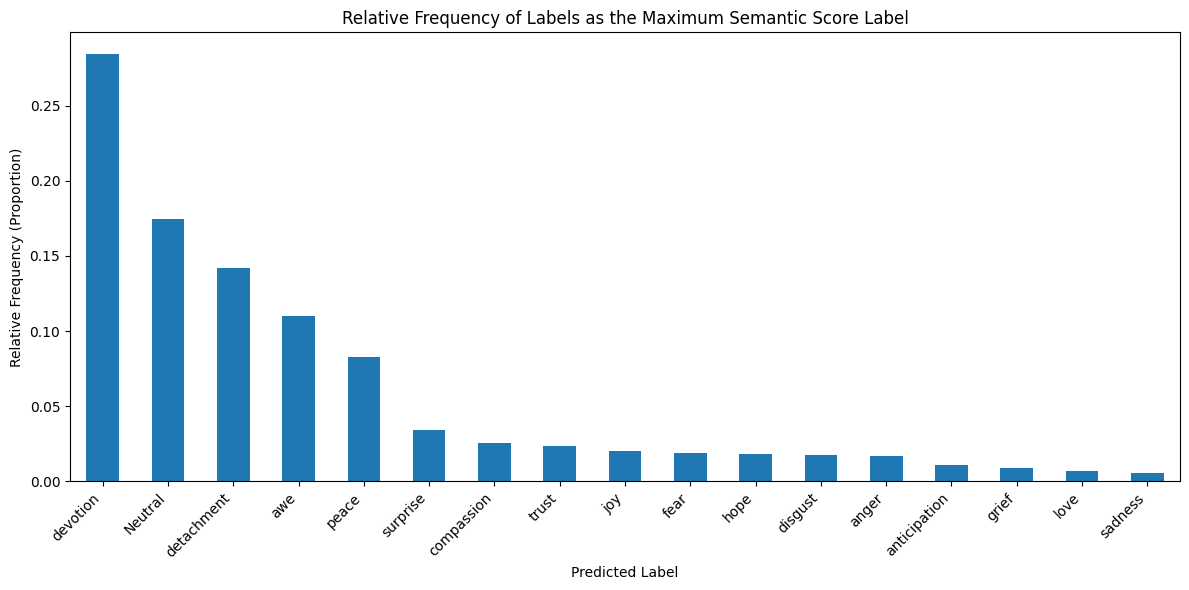

In [ ]:
# prompt: plot a curve of the frequency of a label being max label vs labels all

import matplotlib.pyplot as plt
# To plot the frequency of a label being the max label vs. the labels themselves,
# we first need to count how many times each label appears as the `max_score_label`.

label_counts = max_score_df['max_score_label'].value_counts()

# Now, we can plot these counts. A bar plot is suitable for this.

plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title("Frequency of Labels as the Maximum Semantic Score Label")
plt.xlabel("Predicted Label")
plt.ylabel("Frequency (Count)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# If you want to plot the relative frequency (proportion) instead of raw counts,
# you can divide by the total number of entries.

total_entries = len(max_score_df)
relative_label_frequencies = label_counts / total_entries

plt.figure(figsize=(12, 6))
relative_label_frequencies.plot(kind='bar')
plt.title("Relative Frequency of Labels as the Maximum Semantic Score Label")
plt.xlabel("Predicted Label")
plt.ylabel("Relative Frequency (Proportion)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The request was to plot a curve of "the frequency of a label being max label vs labels all".
# This could be interpreted as plotting the frequencies calculated above against the labels on the x-axis.
# A 'curve' might suggest a line plot, but for categorical data (labels), a bar plot is more appropriate
# to show the distinct frequency for each label.
# If the intention was something else, please clarify. The code above plots the frequency/count of each label
# whenever it was identified as having the maximum semantic score for a given verse.

In [ ]:
from transformers import pipeline

In [ ]:
model = pipeline("text2text-generation",model='google/flan-t5-base')

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
df

,verse,all_predicted_labels,all_predicted_scores
0,“Lord Shri Krishna continued: This phenomenal ...,awe,0.84
1,"Its branches shoot upwards and downwards, der...",wisdom,0.8
2,"In this world its true form is not known, nei...","surrender, surprise, detachment, confusion","0.76, 0.81, 0.97, 0.93"
3,"Beyond lies the Path, from which, when found,...",Neutral,100
4,"The wise attain Eternity when, freed from pri...","wisdom, surrender, equanimity, detachment, cal...","0.98, 0.9, 0.83, 0.88, 0.86"
...,...,...,...
2089,By the sins of these family-slayers resultin...,confusion,0.99
2090,"For we have had it handed down to us, O Kris...",wisdom,0.91
2091,Alas! What a heinous sin we are about to com...,sadness,0.9
2092,Happier far would it be for me if Dhritarash...,"wisdom, detachment","0.9, 0.91"


In [ ]:
df.iloc[2]['all_predicted_labels']

'surrender, surprise, detachment, confusion'

In [ ]:
results = []

In [ ]:
for index, row in df.iterrows():
    emotions = [row['all_predicted_labels'].split(", ")]
    outputs = []

    for label in emotions:
        prompt = f"""You are a literary expert evaluating emotion classification in ancient philosophical texts.

Verse: "{row['verse']}"
Predicted Emotion: {label}

Does this emotion accurately reflect the verse's sentiment? Respond with 'Yes' or 'No' and briefly explain why.
"""
        result = model(prompt)[0]['generated_text']
        outputs.append({'emotion': label, 'evaluation': result})

    results.append({
        'verse': row['verse'],
        'evaluations': outputs
    })


In [ ]:
results

[{'verse': '“Lord Shri Krishna continued: This phenomenal creation, which is both ephemeral and eternal, is like a tree, but having its seed above in the Highest and its ramifications on this earth below. The scriptures are its leaves, and he who understands this, knows. ',
  'output': 'yes'},
 {'verse': ' Its branches shoot upwards and downwards, deriving their nourishment from the Qualities; its buds are the objects of sense; and its roots, which follow the Law causing man’s regeneration and degeneration, pierce downwards into the soil. ',
  'output': 'yes'},
 {'verse': ' In this world its true form is not known, neither its origin nor its end, and its strength is not understood., until the tree with its roots striking deep into the earth is hewn down by the sharp axe of non-attachment. ',
  'output': 'yes'},
 {'verse': ' Beyond lies the Path, from which, when found, there is no return. This is the Primal God from where this ancient creation has sprung. ',
  'output': 'yes'},
 {'vers